<h1>Q-Learning</h1>

<p>Στην συγκεκριμένη άσκηση θα μελετήσετε το στοχαστικό αλγόριθμο Q-Learning, χρησιμοποιώντας το έτοιμο πρόγραμμα που σας δίνεται.</p> <p> Στα πλαίσια του παραδείγματος θα εξετάσετε μία υλοποίηση με Q-learning σχετικά με το σύστημα αυτόματης οδήγησης ενός ταξί. Στα πλαίσια του προβλήματος αυτού θα πρέπει να ικανοποιούνται τα εξής:</p>
<ul>
<li>Το ταξί θα πρέπει να αφήνει τον πελάτη στη σωστή θέση</li>
<li>Το ταξί να ακολουθεί τη συντομότερη δυνατή διαδρομή</li>
<li>Να τηρούνται οι κανόνες κυκλοφορίας και ασφάλειας των επιβατών</li>
</ul>

<p>Στα πλαίσια του προβλήματος έχουμε τα εξής χαρακτηριστικά για την επιβράβευση, τις καταστάσεις και τις ενέργειες.</p>

<h4>Επιβράβευση</h4>
<ul>
<li>Θα έχουμε τη μέγιστη επιβράβευση όταν το ταξί αφήνει έναν πελάτη στην επιθυμητή θέση</li>
<li>Θα υπάρχει ποινή στην περίπτωση όπου το ταξί αφήσει τον πελάτη σε κάποιο λανθασμένο σημείο</li>
<li>Ο agent θα παίρνει μία μικρή σχετικά ποινή στην περίπτωση όπου αργεί να φτάσει στον τελικό προορισμό</li>
</ul>

<p>Γενικά οι παραπάνω αρχές συνοψίζονται στα εξής: "Λαμβάνουμε +20 πόντους για μια επιτυχημένη πτώση και χάνουμε 1 πόντο για κάθε χρονικό βήμα που παίρνει. Υπάρχει επίσης ποινή 10 πόντων για παράνομες ενέργειες παραλαβής και αποχώρησης."</p>

<h4>Πλήθος Καταστάσεων</h4>
<img src="https://storage.googleapis.com/lds-media/images/Reinforcement_Learning_Taxi_Env.width-1200.png">
<p>Στο παράδειγμά μας έχουμε ένα μικρό χώρο 5*5. Από εκεί και πέρα έχουμε 4 προορισμούς και 5 πιθανές θέσεις του πελάτη (παίρνουμε και την περίπτωση ο πελάτης να είναι ήδη μέσα στο τάξι).</p>
<p>Με βάση τα παραπάνω έχουμε 5*5*5*4=500 πιθανές καταστάσεις.</p>

<h4>Πλήθος Ενεργειών</h4>
<p>Έχουμε έξι ενεργειες για το ταξί, οι οποίες είναι οι εξής:</p>
<ul>
<li>0=Νότια</li>
<li>1=Βόρεια</li>
<li>2=Ανατολικά</li>
<li>3=Δυτικά</li>
<li>4=Επιβίβαση</li>
<li>5=Αποβίβαση</li>
</ul>





<p>Πριν συνεχίσετε στην άσκηση να απαντήσετε στο εξής ερώτημα:</p>

<b><p>1. Να περιγράψετε σύντομα τον αλγόριθμο Q-Learning. Σε ποια προβλήματα θεωρείτε ότι ταιριάζει ως τρόπος εκμάθησης η Ενισχυτική Μάθηση (Reinforcement Learning); Ποια είναι η βασική διαφορά του αλγορίθμου Q-Learning από τους αλγορίθμους Policy Iteration και Value Iteration;</p></b>

<p>Στη συνέχεια θα πρέπει να φορτώσετε τη βιβλιοθήκη gym καθώς και το σχετικό dataset<p>

array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]], dtype=uint8)
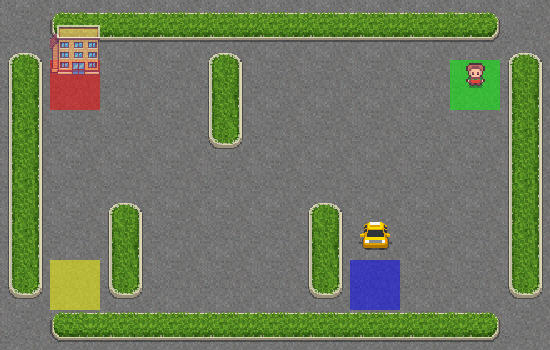

In [45]:
import gym

env = gym.make("Taxi-v3", render_mode="rgb_array")
# Reset the environment to start
env.reset()

# Render the initial state
env.render()

Action Space Discrete(6)
State Space Discrete(500)


array([[[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[110, 109, 106],
        [110, 109, 106],
        [124, 122, 122],
        ...,
        [108, 111, 109],
        [108, 111, 109],
        [118, 119, 119]],

       [[114, 116, 115],
        [114, 116, 115],
        [126, 127, 126],
        ...,
        [112, 113, 111],
        [112, 113, 111],
        [118, 117, 115]],

       ...,

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[116, 115, 116],
        [116, 115, 116],
        [106, 107, 108],
        ...,
        [113, 115, 114],
        [113, 115, 114],
        [117, 114, 117]],

       [[115, 112, 112],
        [115, 112, 112],
        [119, 119, 117],
        ...,
        [123, 119, 118],
        [123, 119, 118],
        [114, 114, 117]]], dtype=uint8)
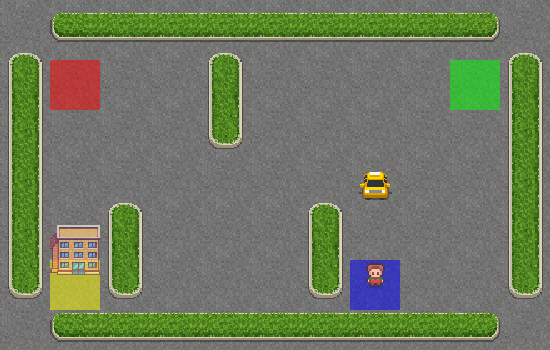

In [46]:
env.reset() # reset environment to a new, random state

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

# Render the initial state
env.render()

<p>Παρακάτω ορίζουμε τις συνεταγμένες του ταξί, τη θέση του πελάτη και το σημείο προορισμού</p>

In [49]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state

State: 328


<p>Παρακάτω είναι η μήτρα επιβράβευσης για το state που ορίσαμε στο προηγούμενο βήμα</p>

In [50]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

<p> Τρέχουμε το παράδειγμά μας χωρις τη χρήση Q-Learning.</p>

<b><p>2. Τα αποτελέσματα είναι ικανοποιητικά; Πως θα μας εξυπηρετούσε η χρήση του Q-Learning;</p></b>

In [52]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, truncated, info = env.step(action)

    if reward == -10:
        penalties += 1

    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1


print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 1347
Penalties incurred: 425


<p>Τώρα θα προσπαθήσουμε να λύσουμε το πρόβλημά μας με τη χρήση του Q-Learning.</p>

<b><p>3. Τι γνωρίζετε για τις παραμέτρους α και γ. Τι θα συμβεί αν έχουν τιμές ίσες με 1;</p></b>

In [53]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [54]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state, _ = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, truncated, info = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1

    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.

CPU times: user 1min 18s, sys: 6.6 s, total: 1min 24s
Wall time: 1min 23s


In [55]:
q_table[328]

array([ -2.40815842,  -2.27325184,  -2.4091201 ,  -2.36086786,
       -10.20248576, -10.06632945])

In [56]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state, _ = env.reset()
    epochs, penalties, reward = 0, 0, 0

    done = False

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, truncated, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 13.35
Average penalties per episode: 0.0


<b><p>4. Συγκρίνετε τους δύο αλγορίθμους με βάση τις παρακάτω μετρικές</p>
<ul>
<li>Μέσος αριθμός παραβάσεων ανά επεισόδιο</li>
<li>Μέσος αριθμός βημάτων ανά διαδρομή</li>
<li>Μέσος αριθμός ανταμοιβών ανά κίνηση</li>
</ul>
<p>Τις παραπάνω συγκρίσεις να τις κάνετε για 100 επεισόδια.</p>
</b>